In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
P_data= pd.read_csv('datasets/parkinson.csv')

In [3]:
P_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
P_data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [5]:
P_data=P_data.drop(columns='name',axis=1)

In [6]:
P_data.shape

(195, 23)

In [7]:
Y=P_data['status']
print(Y.isnull().sum())

0


In [8]:
P_data.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [9]:
P_data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [10]:
print(P_data['MDVP:Fo(Hz)'].unique())

[119.992 122.4   116.682 116.676 116.014 120.552 120.267 107.332  95.73
  95.056  88.333  91.904 136.926 139.173 152.845 142.167 144.188 168.778
 153.046 156.405 153.848 153.88  167.93  173.917 163.656 104.4   171.041
 146.845 155.358 162.568 197.076 199.228 198.383 202.266 203.184 201.464
 177.876 176.17  180.198 187.733 186.163 184.055 237.226 241.404 243.439
 242.852 245.51  252.455 122.188 122.964 124.445 126.344 128.001 129.336
 108.807 109.86  110.417 117.274 116.879 114.847 209.144 223.365 222.236
 228.832 229.401 228.969 140.341 136.969 143.533 148.09  142.729 136.358
 120.08  112.014 110.793 110.707 112.876 110.568  95.385 100.77   96.106
  95.605 100.96   98.804 176.858 180.978 178.222 176.281 173.898 179.711
 166.605 151.955 148.272 152.125 157.821 157.447 159.116 125.036 125.791
 126.512 125.641 128.451 139.224 150.258 154.003 149.689 155.078 151.884
 151.989 193.03  200.714 208.519 204.664 210.141 206.327 151.872 158.219
 170.756 178.285 217.116 128.94  176.824 138.19  182

In [11]:
print(P_data.drop_duplicates(inplace=True))

None


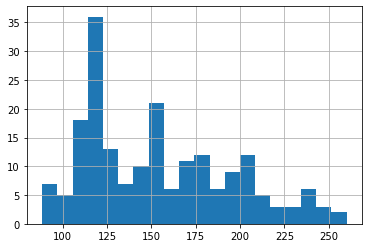

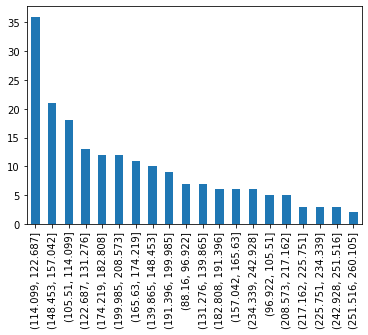

In [12]:
# Histogram for numerical features
import matplotlib.pyplot as plt
import seaborn as sns
P_data['MDVP:Fo(Hz)'].hist(bins=20)
plt.show()
P_data['MDVP:Fo(Hz)'].value_counts(bins=20).plot(kind='bar')
plt.show()


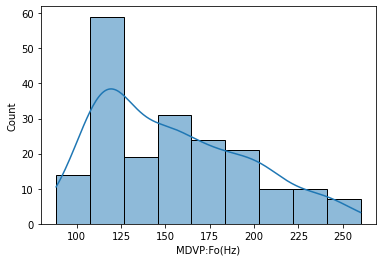

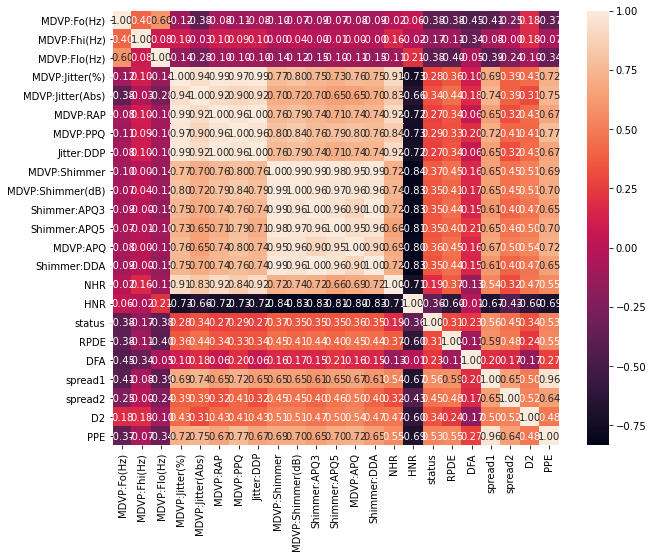

In [13]:
#Distribution plot for a numerical column
sns.histplot(P_data['MDVP:Fo(Hz)'], kde=True)
plt.show()

#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(P_data.corr(), annot=True, fmt='.2f')
plt.show()

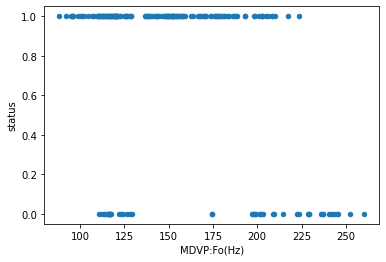

In [14]:
P_data.plot.scatter(x='MDVP:Fo(Hz)', y='status')
plt.show()

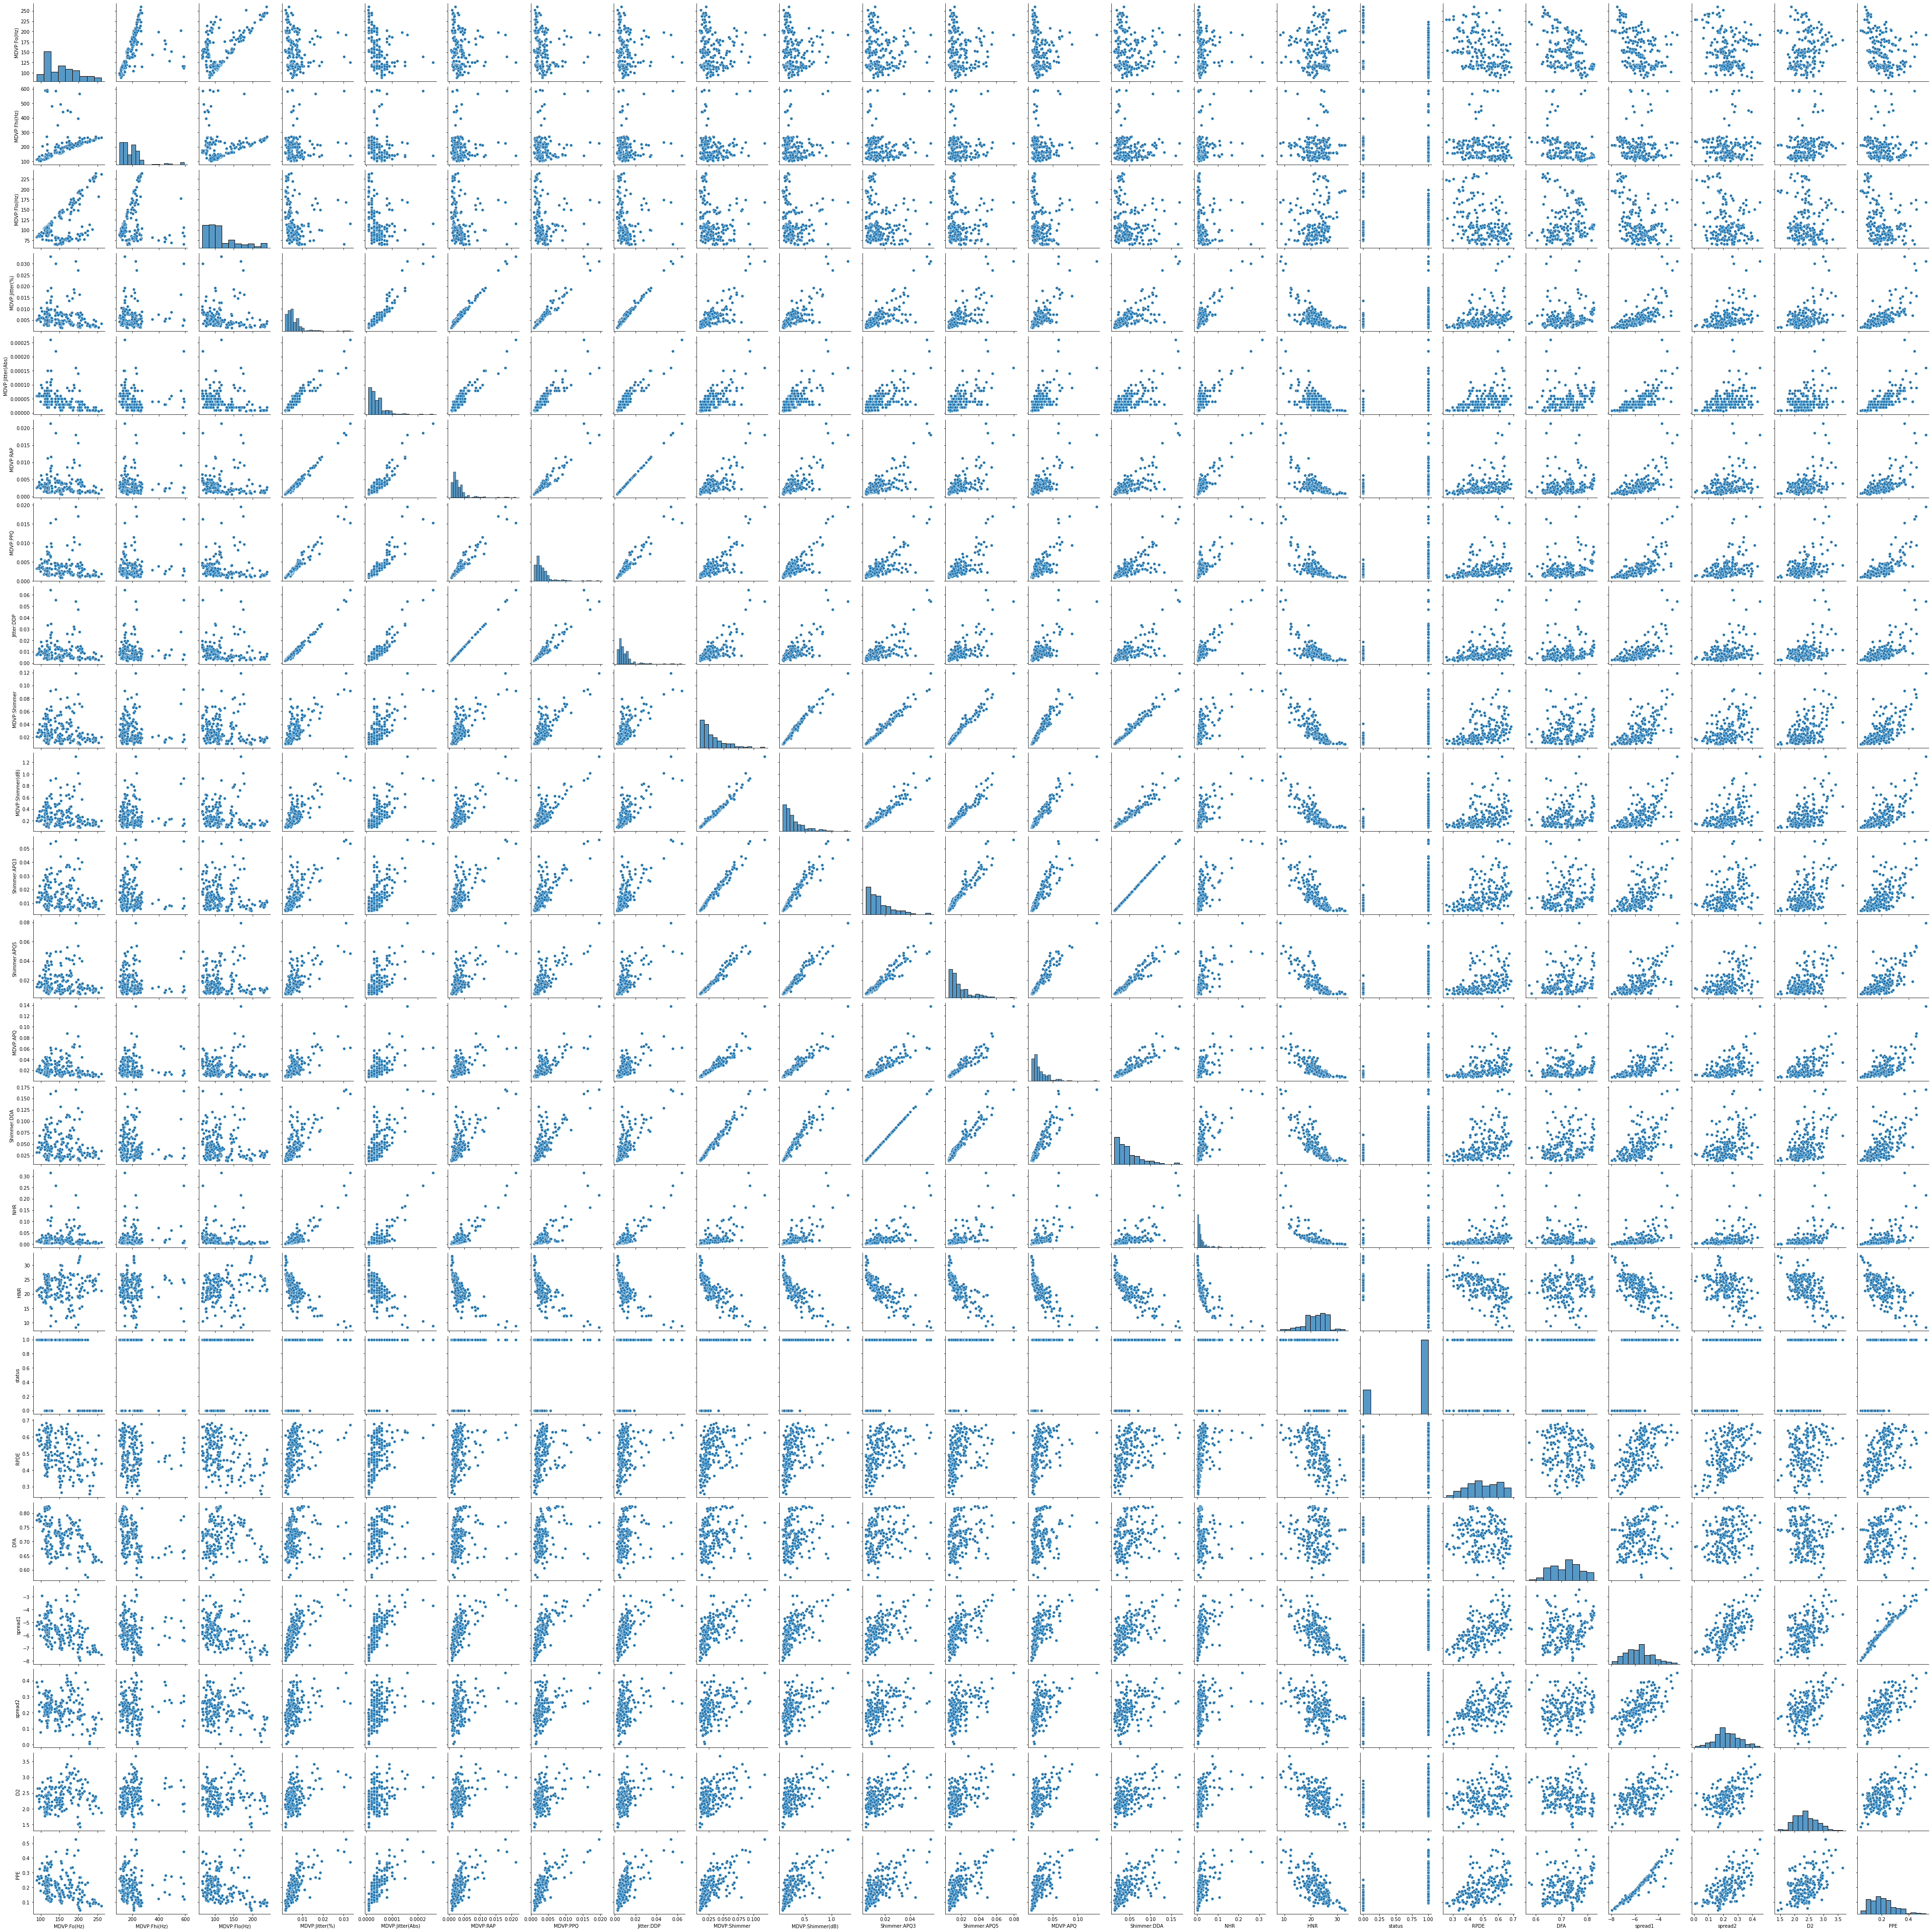

In [15]:
sns.pairplot(P_data)
plt.show()

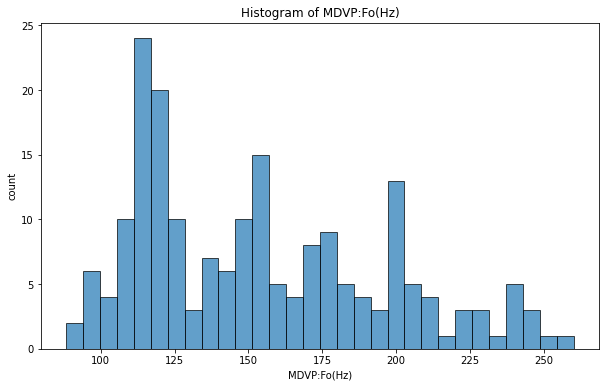

In [16]:
# Plot histogram for MDVP:Fo(Hz)
plt.figure(figsize=(10, 6))
plt.hist(P_data['MDVP:Fo(Hz)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MDVP:Fo(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('count')
plt.show()

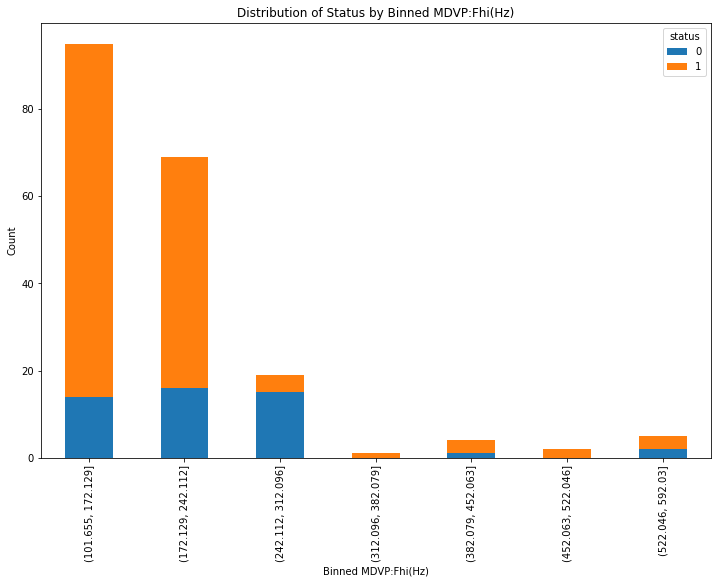

In [17]:
# Define the number of bins
num_bins = 7

P_data['Fhi_bins'] = pd.cut(P_data['MDVP:Fhi(Hz)'], bins=num_bins)

# Group by the binned data and 'status', then plot
grouped_data = P_data.groupby('Fhi_bins')['status'].value_counts().unstack().fillna(0)

# Plotting the grouped data as a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Status by Binned MDVP:Fhi(Hz)')
plt.xlabel('Binned MDVP:Fhi(Hz)')
plt.ylabel('Count')
plt.show()


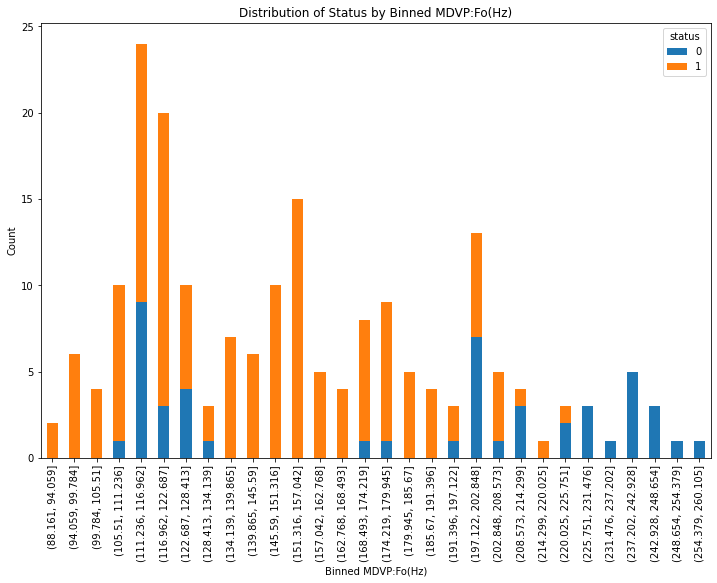

In [18]:
# Assuming df is your dataframe and it's already loaded
# Define the number of bins
num_bins = 30

# Bin the 'MDVP:Fo(Hz)' data
P_data['Fo_bins'] = pd.cut(P_data['MDVP:Fo(Hz)'], bins=num_bins)

# Group by the binned data and 'status', then plot
grouped_data = P_data.groupby('Fo_bins')['status'].value_counts().unstack().fillna(0)

# Plotting the grouped data as a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Status by Binned MDVP:Fo(Hz)')
plt.xlabel('Binned MDVP:Fo(Hz)')
plt.ylabel('Count')
plt.show()


In [19]:
P_data=P_data.drop(columns='Fo_bins',axis=1)
P_data=P_data.drop(columns='Fhi_bins',axis=1)

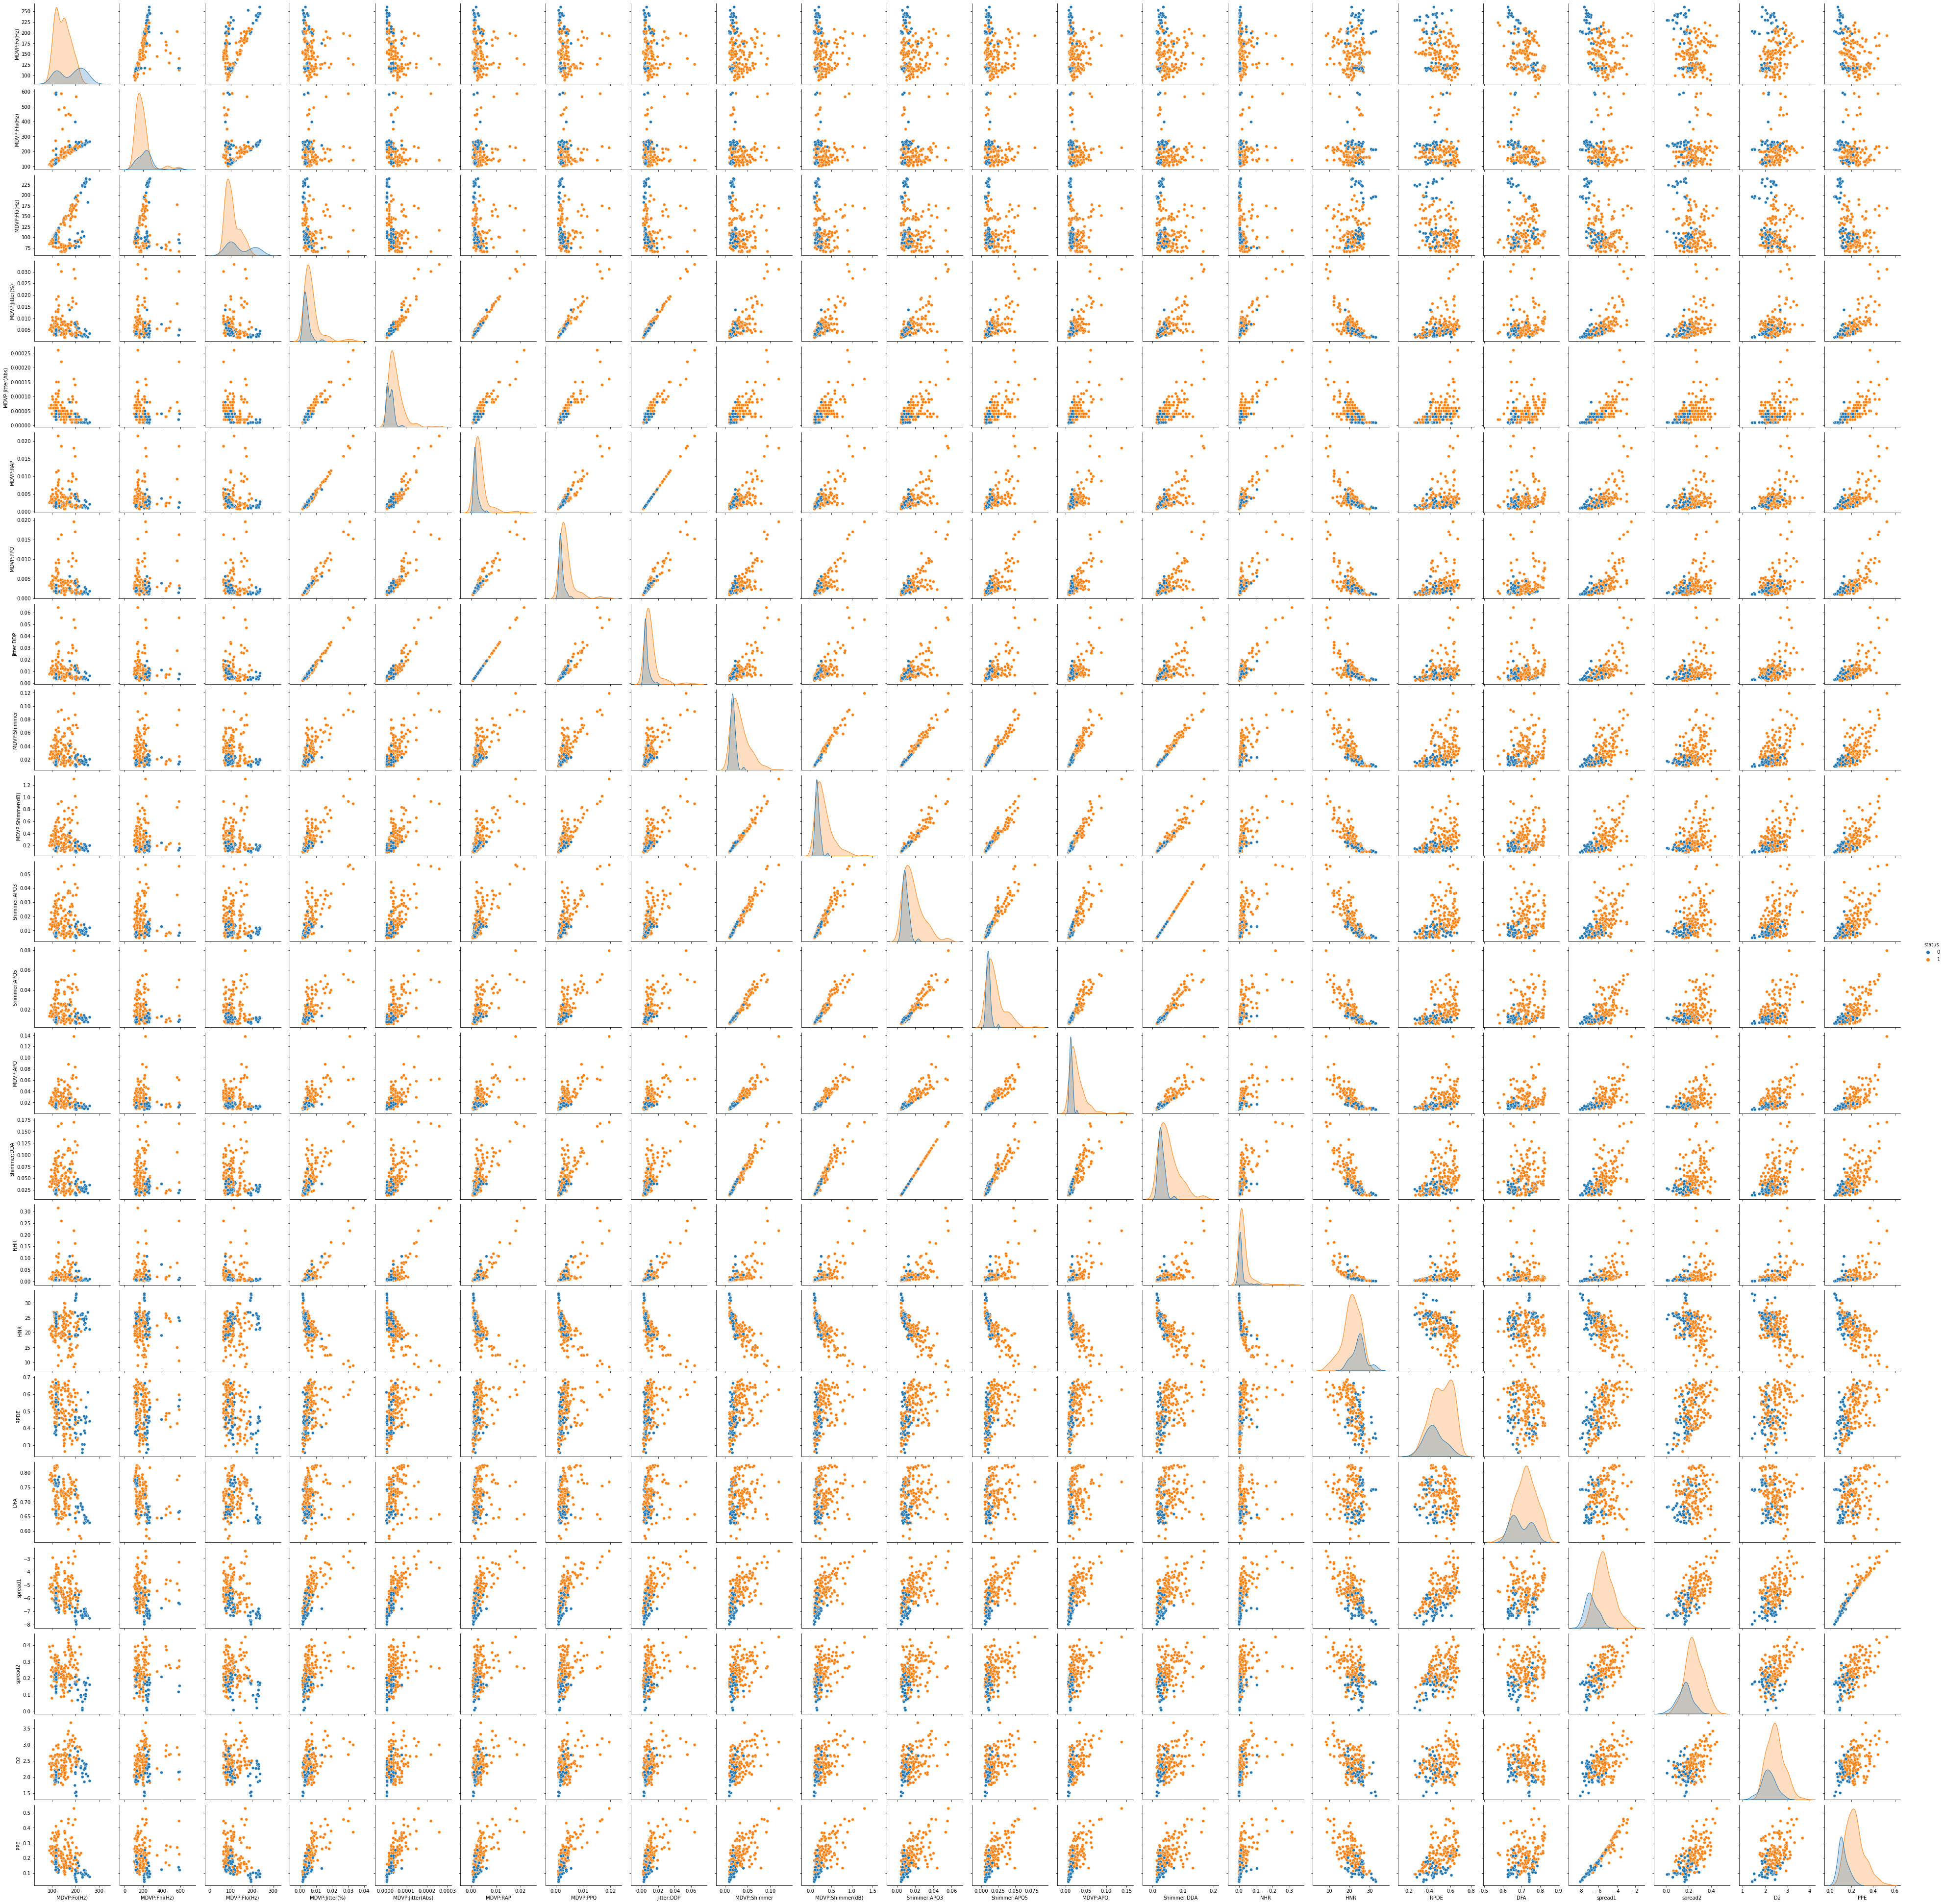

In [20]:
sns.pairplot(P_data, vars=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'],hue="status")

In [21]:
P_data.to_csv('P_data.csv', index=False)